<a href="https://colab.research.google.com/github/Suman-Bhandar/PythonProgramming/blob/gh-pages/Titanic_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

## The Data

Let's start by reading in the titanic_train.csv file into a pandas dataframe.

In [ ]:
train = pd.read_csv('train.csv')

In [ ]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [ ]:
train.dtypes

PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object

# Exploratory Data Analysis

Let's begin some exploratory data analysis! We'll start by checking out missing data!

## Missing Data

We can use seaborn to create a simple heatmap to see where we are missing data!

In [ ]:
train.isnull().mean()

PassengerId    0.000000
Survived       0.000000
Pclass         0.000000
Name           0.000000
Sex            0.000000
Age            0.198653
SibSp          0.000000
Parch          0.000000
Ticket         0.000000
Fare           0.000000
Cabin          0.771044
Embarked       0.002245
dtype: float64

__It is evident from the above that 77 percent of Cabin column is nulls and age with 19 percent and the embarked with 0.22__

<AxesSubplot:xlabel='Survived', ylabel='count'>

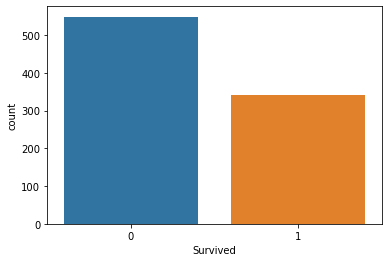

In [ ]:
#Since our traget variable is survived let stickk to that for basic analysis
sns.countplot(x='Survived',data=train)

<AxesSubplot:xlabel='Survived', ylabel='count'>

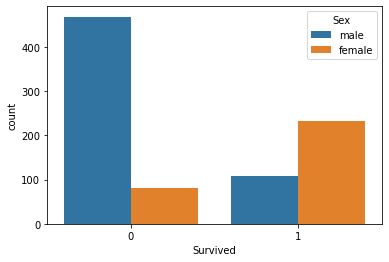

In [ ]:
#Now lets see out of these survived how many were male and female

sns.countplot(x='Survived',hue='Sex',data=train)

From the above graph it is evident that most of survived sex were females


<AxesSubplot:xlabel='Survived', ylabel='count'>

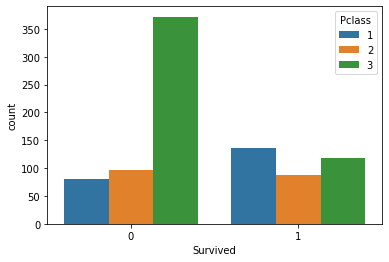

In [ ]:
#Based on survived lets check which passenger class people have survived the most

sns.countplot(x='Survived',hue='Pclass',data=train)

It seems that people who died in this mishap are mostly from passenger class 3 and who mostly survived were from class 1

/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Age', ylabel='Density'>

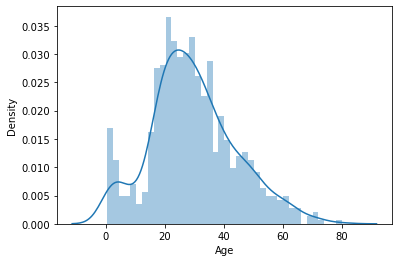

In [ ]:
#lets see the average age of person who were on borded
sns.distplot(train['Age'].dropna(),bins=40)

Mostly people were from 20 to 30 age Category

<AxesSubplot:xlabel='SibSp', ylabel='count'>

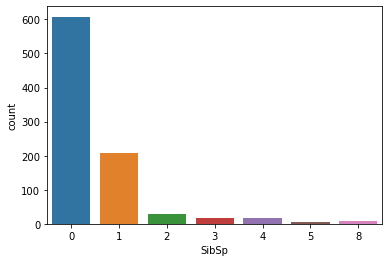

In [ ]:
sns.countplot(x='SibSp',data=train)

## DATA CLEANING

<AxesSubplot:>

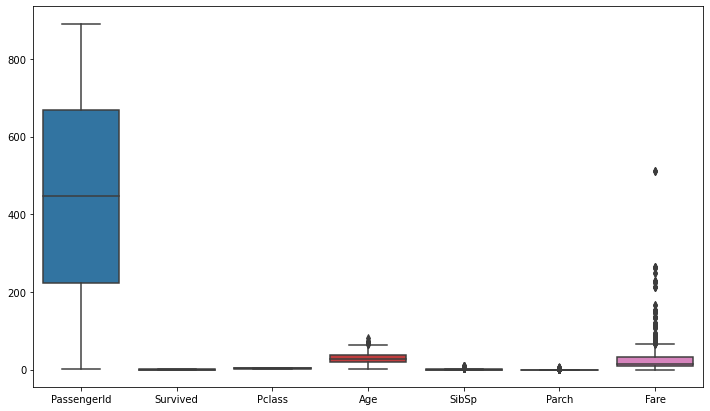

In [ ]:
#LETS CHECK THE OUTLIERS IN DATSET
plt.figure(figsize=(12, 7))
sns.boxplot(data=train)

There is few outliers in Fare 

In [ ]:
train.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [ ]:
#Handling missing value age
mean_val=train['Age'].mean()
mean_val

29.69911764705882

In [ ]:
train['Age']=train['Age'].fillna(value='mean_val')

In [ ]:
train['Age'].isnull().sum()

0

In [ ]:
train['Age'].dtypes

dtype('O')

In [ ]:
train.Cabin.value_counts()

C23 C25 C27    4
B96 B98        4
G6             4
F33            3
F2             3
              ..
C110           1
E10            1
B41            1
A7             1
C62 C64        1
Name: Cabin, Length: 147, dtype: int64

In [ ]:
train['Cabin'] = (train['Cabin'].isnull()).astype('int')

In [ ]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22,1,0,A/5 21171,7.2500,1,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38,1,0,PC 17599,71.2833,0,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26,0,0,STON/O2. 3101282,7.9250,1,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35,1,0,113803,53.1000,0,S
4,5,0,3,"Allen, Mr. William Henry",male,35,0,0,373450,8.0500,1,S


In [ ]:
train['Cabin'].isnull().sum()

0

In [ ]:
mode_val=train['Embarked'].mode()[0]

In [ ]:
mode_val

'S'

In [ ]:
train['Embarked']=train['Embarked'].fillna(value='mode_val')

In [ ]:
train['Embarked'].isnull().sum()

0

__All null values has been handled and now lets walk through outliers__


In [ ]:
train['Fare'].quantile(0.25),train['Fare'].quantile(0.75)

(7.9104, 31.0)

In [ ]:
iqr=train['Fare'].quantile(0.75)-train['Fare'].quantile(0.25)

In [ ]:
iqr

23.0896

In [ ]:
q1=train['Fare'].quantile(0.25)
q2=train['Fare'].quantile(0.75)


whisker1=q1-(1.5*iqr)
whisker2=q2+(1.5*iqr)

whisker1,whisker2

(-26.724, 65.6344)

## Dealing with categorical dataset

In [ ]:
#Categorical variables in the data
train.dtypes 

PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age             object
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin            int64
Embarked        object
dtype: object

In [ ]:
#onehot encoding
train['Embarked'] = pd.get_dummies(train['Embarked'],drop_first=True)

In [ ]:
train['Embarked'].head()

0    0
1    0
2    0
3    0
4    0
Name: Embarked, dtype: uint8

In [ ]:
train['Sex'] = pd.get_dummies(train['Sex'],drop_first=True)

In [ ]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    uint8  
 5   Age          891 non-null    object 
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        891 non-null    int64  
 11  Embarked     891 non-null    uint8  
dtypes: float64(1), int64(6), object(3), uint8(2)
memory usage: 71.5+ KB


In [ ]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",1,22,1,0,A/5 21171,7.2500,1,0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,38,1,0,PC 17599,71.2833,0,0
2,3,1,3,"Heikkinen, Miss. Laina",0,26,0,0,STON/O2. 3101282,7.9250,1,0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,35,1,0,113803,53.1000,0,0
4,5,0,3,"Allen, Mr. William Henry",1,35,0,0,373450,8.0500,1,0


In [ ]:
train.drop(['Sex','Embarked','Name','Ticket','Age'],axis=1,inplace=True)

In [ ]:
train.head()

,PassengerId,Survived,Pclass,SibSp,Parch,Fare,Cabin
0,1,0,3,1,0,7.2500,1
1,2,1,1,1,0,71.2833,0
2,3,1,3,0,0,7.9250,1
3,4,1,1,1,0,53.1000,0
4,5,0,3,0,0,8.0500,1


Great! Our data is ready for our model!

# Building a Logistic Regression model

Let's start by splitting our data into a training set and test set (there is another test.csv file that you can play around with in case you want to use all this data for training).

## Train Test Split

### Segregating variables: Independent and Dependent Variables

In [ ]:
#seperating independent and dependent variables
x = train.drop(['Survived'], axis=1)
y = train['Survived']
x.shape, y.shape

((891, 6), (891,))

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
train_x,test_x,train_y,test_y=train_test_split(x,y,test_size=0.30, 
                                                    random_state=101)

## Training and Predicting

In [ ]:
from sklearn.linear_model import LogisticRegression

In [ ]:
logmodel = LogisticRegression()
logmodel.fit(train_x,train_y)

LogisticRegression()

In [ ]:
predictions = logmodel.predict(test_x)

In [ ]:
from sklearn.metrics import confusion_matrix

In [ ]:
accuracy=confusion_matrix(test_y,predictions)

In [ ]:
accuracy

array([[136,  18],
       [ 71,  43]])

We can check precision,recall,f1-score using classification report!

In [ ]:
from sklearn.metrics import classification_report

In [ ]:
print(classification_report(test_y,predictions))

              precision    recall  f1-score   support

           0       0.66      0.88      0.75       154
           1       0.70      0.38      0.49       114

    accuracy                           0.67       268
   macro avg       0.68      0.63      0.62       268
weighted avg       0.68      0.67      0.64       268

